## Import Libraries

In [1]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\python\Machine learning\Datasets\salary.csv')
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


## Data preparation 

In [3]:
df.shape

(32561, 5)

In [4]:
df.isnull().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

In [5]:
df.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', 'income'], dtype='object')

In [6]:
#df=df.replace({'education.num':9},np.NaN)

In [7]:
#df=df.fillna({'education.num':'sachin'});df

In [8]:
income_set=set(df['income'])
df['income']=df['income'].map({'<=50K':0,'>50K':1}).astype(int)
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


In [9]:
#df=df.replace({'<=50K':0,'>50K':1})

In [10]:
x=df.iloc[:,:-1]
x

,age,education.num,capital.gain,hours.per.week
0,90,9,0,40
1,82,9,0,18
2,66,10,0,40
3,54,4,0,40
4,41,10,0,40
...,...,...,...,...
32556,22,10,0,40
32557,27,12,0,38
32558,40,9,0,40
32559,58,9,0,40


In [11]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

### Splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.metrics import accuracy_score

### Finding the best value of 'K' so that classification error will minimum.

In [16]:
error=[]
for i in range(1,40,2):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error.append(1-accuracy_score(y_test,y_pred))

In [17]:
df1=pd.DataFrame({'k':np.arange(1,40,2),'error':error});df1

,k,error
0,1,0.228105
1,3,0.192728
2,5,0.187938
3,7,0.182287
4,9,0.182901
5,11,0.180690
6,13,0.183147
7,15,0.177005
8,17,0.179585
9,19,0.180199


In [18]:
df1[(df1['error']==min(df1['error']))]

,k,error
7,15,0.177005


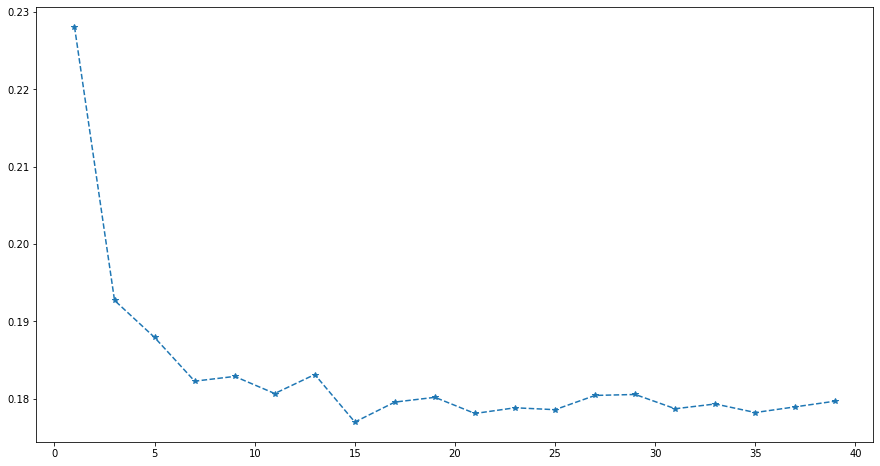

In [19]:
plt.figure(figsize=(15,8))
plt.plot(range(1,40,2),error,'--*')

# Fitting the Best model.

In [20]:
model=KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

# Standard Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Prediction on Test data.

In [22]:
y_pred=model.predict(x_test)
data=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
data

C:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,y_test,y_pred
22278,0,0
8950,0,0
7838,0,0
16505,0,0
19140,1,0
...,...,...
4149,0,0
17168,0,0
21748,0,0
18155,0,0


## Prediction

In [23]:
age=int(input('Enter the age of a Employee:'))
edu=int(input('Enter the education of a Employee:'))
cap=int(input('Enter the capital gain of a Employee:'))
wh=int(input("Enter the Hour's per week of a Employee:"))
Newemp=[[age,edu,cap,wh]]
result=model.predict(sc.transform(Newemp))
result
if result==1:
    print("Employee might get salary above 50K")
else:
    print("Employee might not get salary above 50K")

Enter the age of a Employee:54
Enter the education of a Employee:10
Enter the capital gain of a Employee:0
Enter the Hour's per week of a Employee:40
Employee might not get salary above 50K


C:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Confusion matrix And accuracy score of the model

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[6193,    0],
       [1948,    0]], dtype=int64)

In [26]:
acc=accuracy_score(y_test,y_pred)*100
acc

76.07173565900996